<a href="https://colab.research.google.com/github/jeaimehp/HPC-inthe-City-ExcellentCode/blob/master/Local_Conda_Jupyter_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HPC in the City Jupyter Training

**Purpose**

This notebook was created to display some python basics using the Jupyter Platform

----

## Using the requests module to download a dataset file

* Requests is an elegant and simple HTTP library for Python, built for human beings.
  * Reference: https://requests.readthedocs.io/en/master/


In [1]:
import requests

# Data Source: DataAtlanta - http://hackhpc.org/data/#local
url = 'https://nwis.waterdata.usgs.gov/nwis/uv?cb_00010=on&cb_00060=on&cb_00065=on&cb_00095=on&cb_00300=on&cb_00400=on&cb_63680=on&format=rdb&site_no=02336240&period=&begin_date=2020-01-01&end_date=2020-10-07'

In [2]:
# Downloads the web request using the provided url
r = requests.get(url)

# Writes out the request as a tab seperated value (tsv) file 
with open('atl-water-data.tsv', 'wb') as f:
    f.write(r.content)

## Using the os library to perform a directory listing

* The os module provides a portable way of using operating system dependent functionality.
  * Reference: https://docs.python.org/3/library/os.html 

In [ ]:
# Import the os library to list the files in the current directory
import os
# The empty () signifies listing the files in the current working directory 
print (os.listdir()) 

['.DS_Store', 'Google-colab_version.ipynb', 'atl-water-data.tsv', 'copy of dataset', 'Jupyter-Training.py', '.ipynb_checkpoints', 'Local-Conda-Jupyter_version.ipynb', 'replit_version.py']


In [ ]:
# Preview the first few lines of the dataset file
N = 45
with open("atl-water-data.tsv") as myfile:
    head = [next(myfile) for x in range(N)]
for l in head:
    print(l, end='')

# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
#
# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_support_nwisweb@usgs.gov
# retrieved: 2020-10-08 10:27:57 EDT       (nadww02)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 02336240 S.F. PEACHTREE CREEK JOHNSON RD, NEAR ATLANTA, GA
# ---------------------------------------

# Saving the dataset as a DataFrame using Pandas

* Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
  * Reference: https://pandas.pydata.org/

In [ ]:
# Import the tsv into a dataframe in Pandas
import pandas as pd

atlwaterDF = pd.read_csv('atl-water-data.tsv', sep='\t', header=35)
atlwaterDF = atlwaterDF.drop([0])
atlwaterDF.head()

,agency_cd,site_no,datetime,tz_cd,39623_00065,39623_00065_cd,39624_00060,39624_00060_cd,39626_00010,39626_00010_cd,39627_00095,39627_00095_cd,39628_00300,39628_00300_cd,39629_00400,39629_00400_cd,39630_63680,39630_63680_cd
1,USGS,02336240,2020-01-01 00:00,EST,3.55,A,11.3,A,9.7,A,125,A,10.3,A,6.9,A,3.2,A
2,USGS,02336240,2020-01-01 00:15,EST,3.55,A,11.3,A,9.7,A,125,A,10.3,A,6.9,A,3.0,A
3,USGS,02336240,2020-01-01 00:30,EST,3.55,A,11.3,A,9.6,A,125,A,10.3,A,6.9,A,3.1,A
4,USGS,02336240,2020-01-01 00:45,EST,3.55,A,11.3,A,9.6,A,125,A,10.3,A,6.9,A,3.1,A
5,USGS,02336240,2020-01-01 01:00,EST,3.55,A,11.3,A,9.6,A,126,A,10.3,A,6.9,A,2.9,A


# Header information provided by the downloaded file

Data for the following 1 site(s) are contained in this file
 USGS 02336240 S.F. PEACHTREE CREEK JOHNSON RD, NEAR ATLANTA, GA

-----------------------------------------------------------------------------------

 Data provided for site 02336240
 
 
|    TS |  parameter  |   Description                                             |
|-------|-------------|-----------------------------------------------------------|
|39623  |     00065   |  Gage height, feet                                        |
|39624  |     00060   |  Discharge, cubic feet per second                         |
|39626  |     00010   |  Temperature, water, degrees Celsius                      |
|39627  |     00095   |  Specific conductance, water, unfiltered                  |
|39628  |     00300   |  Dissolved oxygen, water, unfiltered, milligrams per liter|
|39629  |     00400   |  pH, water, unfiltered, field, standard units             |
| 39630 |      63680  |   Turbidity, water, unfiltered                            |
        

# Dataframe basic statisical analysis

The .describe() method can be used to show general information regarding a large dataset.

In [ ]:
atlwaterDF.describe()

,agency_cd,site_no,datetime,tz_cd,39623_00065,39623_00065_cd,39624_00060,39624_00060_cd,39626_00010,39626_00010_cd,39627_00095,39627_00095_cd,39628_00300,39628_00300_cd,39629_00400,39629_00400_cd,39630_63680,39630_63680_cd
count,26969,26969,26969,26969,26577,26577,26622,26622,25365,25365,23188,23188,23802,23802,25328,25328,19669,19669
unique,1,1,26969,2,524,2,674,3,250,2,169,2,74,2,17,2,1117,2
top,USGS,02336240,2020-09-07 12:30,EDT,3.66,A,15.3,A,24.4,A,136,A,7.6,A,7.1,A,3.2,A
freq,26969,26969,1,20532,744,15578,853,15574,353,20029,1198,18306,907,18849,5473,19996,607,15685


# Plotting a dataset using Matplotlib

* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
  * Reference: https://matplotlib.org/

In the below graph we could be looking at Dissolve Oxygen (39628_00300	Dissolved oxygen) as a metric for water quality health from January - October 2020


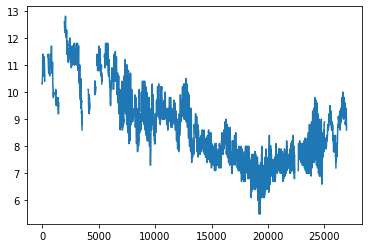

In [ ]:
# matplotlib library needed to produce plots
import matplotlib.pyplot as plt
plt.close('all')
plt.figure()
#Using the dataframe with the dataset, defining the needed column, 
#converting the datatype from string into numbers and then ploting the results
atlwaterDF['39628_00300'].apply(pd.to_numeric).plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')